<a href="https://colab.research.google.com/github/vaishnavi2810-code/AI-For-Beginners/blob/main/token_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical Regularities of Language

In this first homework assignment, you will familiarize yourself with some empirical regularities of natural language, Shannon entropy and Zipf's Law.

Read through this Jupyter notebook and fill in the parts marked with `TODO`. When you're ready to submit, print the notebook as a PDF and upload to Gradescope.

## Shannon Entropy

Shannon borrowed the concept of entropy from statistical physics to develop _information theory_, focused on encoding and compressing messages. A few years later, in 1950, he applied information theory to analyze human predictive ability—in other words, the entropy of the human language model. You can read the original article, [Prediction and Entropy of Printed English](https://languagelog.ldc.upenn.edu/myl/Shannon1950.pdf), for more details.

Your first task is to collect data on how predictable different letters are in an English sentence, depending on how much context in a word or sentence you have.

Go to the [Shannon game page](https://www.ccs.neu.edu/home/dasmith/courses/cs6120/shannon/) that we demonstrated in class. We already guessed part of Text 1, so work through Texts 2, 3, and 4.

In [ ]:
# TODO: Enter the arrays of numbers of guesses for Texts 2, 3, and 4 here.
text2 = [1,7,1,1,1,1,1,1,9,4,1,1,1,5,1,1,1,1,7,1,4,1,1,1,1,1,1,12,1,1,5,1,11,1,1,1,1,1,3,1,1,1,1,1,1,1,1]
text3 = [3,2,27,14,13,2,4,1,5,15,15,1,2,21,1,1,1,1,2,1,1,1,1,1,1,14,3,18,2,1,1,1,1,2,1,15,1,21,1,1,1,4,10,5,27,15,1,1,3,1,1,1,12,19,1,14,1,18,6,3,1,1,1,1,1,1,1]
text4 = [7,3,6,2,2,10,20,2,1,1,1,1,1,1,1,20,6,15,3,1,1,1,1,1,4,2,9,6,20,1,1,1,3,1,20,22,1,1,1,6,1,16,25,1,21,9,3,2,1,1,1,1,1,3,1,1,1]

print(len(text2), len(text3), len(text4))
print(len("federal officials began to stockpile ammunition"))
print(len("to draw conclusions from materials often discordant is no easy task"))
print(len("each iteration tends to beget a better copy than the last"))

47 67 57
47
67
57


Rearrange the guess data into a two-dimensional array, relating number of characters of context (0, 1, 2, ...) to number of guesses required.

In other words, you might look in cell (2, 1) and read "2" if the number of times it took one guess to get the right letter with two characters of context was 2.

In [ ]:
# TODO: Create array of counts of guesses. Print out the array so we can see it.
text2 = [1,7,1,1,1,1,1,1,9,4,1,1,1,5,1,1,1,1,7,1,4,1,1,1,1,1,1,12,1,1,5,1,11,1,1,1,1,1,3,1,1,1,1,1,1,1,1]
import numpy as np
import pandas as pd

def make_context_guess_matrix(guesses):
    """
    Rearrange guess data into a 2D array.
    Row = context size (0, 1, 2, ...)
    Col = number of guesses (1, 2, 3, ...)
    Entry = how many times that many guesses occurred at that context.
    """
    max_context = len(guesses) - 1
    max_guess = max(guesses)

    # matrix with columns = 1..max_guess
    counts = np.zeros((max_context+1, max_guess), dtype=int)

    for context, guess in enumerate(guesses):
        counts[context, guess-1] += 1   # shift by 1

    return counts

matrix_for_text2 = make_context_guess_matrix(text2)
matrix_for_text3 = make_context_guess_matrix(text3)
matrix_for_text4 = make_context_guess_matrix(text4)
#df = pd.DataFrame(matrix, columns=range(1, matrix.shape[1]+1))
#print(df.to_string())

max_rows = max(matrix_for_text2.shape[0],matrix_for_text3.shape[0], matrix_for_text4.shape[0])
max_cols = max(matrix_for_text2.shape[1],matrix_for_text3.shape[1], matrix_for_text4.shape[1])

def pad_matrix(mat, rows, cols):
  out = np.zeros((rows, cols), dtype=int)
  out[:mat.shape[0], :mat.shape[1]] = mat
  return out

matrix_for_text2 = pad_matrix(matrix_for_text2, max_rows, max_cols)
matrix_for_text3 = pad_matrix(matrix_for_text3, max_rows, max_cols)
matrix_for_text4 = pad_matrix(matrix_for_text4, max_rows, max_cols)

# Combined result
combined = matrix_for_text2 + matrix_for_text3 + matrix_for_text4

df = pd.DataFrame(combined, columns=range(1, combined.shape[1]+1))
print(df.to_string())


    1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
0    1   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1    0   1   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2    1   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
3    1   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
4    1   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
5    1   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
6    1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
7    2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
8

Now you can compute Shannon's upper and lower bounds on the entropy of your predictive distribution for English. The upper bound, as a function of the number of context characters $N$, is just the Shannon entropy of the distribution of numbers of guesses. In other words, it's the entropy of the original text as &ldquo;reduced&rdquo; by the human encoder to a sequence of numbers of guesses.

$F_N = -\sum_{i=1}^{27} q_i^N \log_2 q_i^N$

where $q_i^N$ is the number of times you took $i$ guesses with $N$ characters of context, i.e., one of the cells in the table you computed. The number of guesses ranges from 1 to 27 since we restrict ourselves to 26 letters plus space. In computing entropy, we define $0 \log 0 = 0$.

In [ ]:
# TODO: Compute the upper bound for each amount of context N and print it out.

def compute_entropy_per_context(matrix):
    """
    Compute Shannon entropy upper bound for each context level.
    matrix: 2D array, rows=context, cols=guesses (1..27)
    """
    entropies = []
    for row in matrix:
        total = row.sum()
        if total == 0:
            entropies.append(0.0)
            continue
        probs = row / total
        #q = np.cumsum(probs[::-1])[::-1]

        # Upper bound = sum of q_i
        #ub = np.sum(q)
        #entropies.append(ub)
        entropy = -np.sum(probs[probs > 0] * np.log2(probs[probs > 0]))
        entropies.append(entropy)
    return entropies

# Example: compute from combined matrix
entropies = compute_entropy_per_context(combined)

for N, H in enumerate(entropies):
    print(f"Context {N}: Entropy upper bound = {H:.4f} bits")


Context 0: Entropy upper bound = 1.5850 bits
Context 1: Entropy upper bound = 1.5850 bits
Context 2: Entropy upper bound = 1.5850 bits
Context 3: Entropy upper bound = 1.5850 bits
Context 4: Entropy upper bound = 1.5850 bits
Context 5: Entropy upper bound = 1.5850 bits
Context 6: Entropy upper bound = 1.5850 bits
Context 7: Entropy upper bound = 0.9183 bits
Context 8: Entropy upper bound = 1.5850 bits
Context 9: Entropy upper bound = 1.5850 bits
Context 10: Entropy upper bound = 0.9183 bits
Context 11: Entropy upper bound = -0.0000 bits
Context 12: Entropy upper bound = 0.9183 bits
Context 13: Entropy upper bound = 1.5850 bits
Context 14: Entropy upper bound = -0.0000 bits
Context 15: Entropy upper bound = 0.9183 bits
Context 16: Entropy upper bound = 0.9183 bits
Context 17: Entropy upper bound = 0.9183 bits
Context 18: Entropy upper bound = 1.5850 bits
Context 19: Entropy upper bound = -0.0000 bits
Context 20: Entropy upper bound = 0.9183 bits
Context 21: Entropy upper bound = -0.0000

Shannon derived a lower bound on entropy from the guess data as

$\sum_{i=1}^{27} i(q_i^N - q_{i+1}^N) \log_2 i$

In [ ]:
# TODO: Compute thew lower bound for each amount of context N and print it out.
def lower_bound(matrix):
  entropies = []
  for row in matrix:
    total = row.sum()
    if total == 0:
      entropies.append(0.0)
      continue
    probs = row/total
    probs_ext = np.concatenate([probs,[0.0]])
    values = np.arange(1, len(probs_ext))
    diff = probs_ext[:-1] - probs_ext[1:]
    term = values*diff*np.log2(values)
    entropies.append(np.sum(term))
  return np.array(entropies)

# Example: compute from combined matrix
entropies = lower_bound(combined)

for N, H in enumerate(entropies):
    print(f"Context {N}: Entropy lower bound = {H:.4f} bits")


Context 0: Entropy lower bound = 2.2989 bits
Context 1: Entropy lower bound = 2.9655 bits
Context 2: Entropy lower bound = 3.3569 bits
Context 3: Entropy lower bound = 2.3991 bits
Context 4: Entropy lower bound = 2.3621 bits
Context 5: Entropy lower bound = 2.2300 bits
Context 6: Entropy lower bound = 2.9910 bits
Context 7: Entropy lower bound = 0.6667 bits
Context 8: Entropy lower bound = 2.7130 bits
Context 9: Entropy lower bound = 2.8485 bits
Context 10: Entropy lower bound = 1.7668 bits
Context 11: Entropy lower bound = 0.0000 bits
Context 12: Entropy lower bound = 0.6667 bits
Context 13: Entropy lower bound = 3.1366 bits
Context 14: Entropy lower bound = 0.0000 bits
Context 15: Entropy lower bound = 1.9093 bits
Context 16: Entropy lower bound = 1.3000 bits
Context 17: Entropy lower bound = 1.7668 bits
Context 18: Entropy lower bound = 2.9655 bits
Context 19: Entropy lower bound = 0.0000 bits
Context 20: Entropy lower bound = 1.0817 bits
Context 21: Entropy lower bound = 0.0000 bit

## Zipf's Law

Now let's look at some text data directly to see the skewed distribution of tokens predicted by Zipf's Law. Recall that Zipf's law states that a word's rank (from the most common word at rank 1 on down) to its frequency is approximately a constant, i.e., $r \cdot f = k$. Equivalently, we can divide both sides by the total number of tokens $N$ to get $r \cdot P_r = c$, where $c = k/N$ and $P_r = f/N$ is the _relative frequency_ of word $r$.

We start by downloading a sample of 1000 open-access English books from [Project Gutenberg](https://gutenberg.org/).

In [2]:
# If your local environment doesn't have the wget command,
# you can comment this out and download it manually.
!wget "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"

--2025-09-18 23:48:11--  http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz
Resolving khoury.northeastern.edu (khoury.northeastern.edu)... 52.70.229.197
Connecting to khoury.northeastern.edu (khoury.northeastern.edu)|52.70.229.197|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150984197 (144M) [application/x-gzip]
Saving to: ‘pg-sample.json.gz’

pg-sample.json.gz   100%[===================>] 143.99M  22.5MB/s    in 15s     

2025-09-18 23:48:27 (9.42 MB/s) - ‘pg-sample.json.gz’ saved [150984197/150984197]



The file is compressed with gzip and is in a JSON lines format. Each line is one JSON record, which we parse with the `json` library.

Here we print out the keys in the first record: `id`, `author`, `title`, and `text`.

In [3]:
import gzip, json
for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
  rec = json.loads(line)
  print(rec.keys())
  print(rec['author'])
  print(rec['title'])
  print(rec['text'][0:100])
  break

dict_keys(['id', 'author', 'title', 'text'])
Jefferson, Thomas
The Declaration of Independence of the United States of America


This is a retranscription of one of the first Project
Gutenberg Etexts, offically dated December 3


Your task now is to **tokenize** the text in the `text` field of each record into an array of words. Later on in this course, we will discuss learning better tokenizers. For now, you should separate words on whitespace (space, newline, tab) and punctuation. Convert the tokens to lower case, and keep only those tokens that have at least one letter a-z in them. In general, numerals in text tend not to follow Zipf's law but [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law).

You might use _regular expressions_ (e.g., the `re.split` function) to help with tokenization and filtering.

After you have tokenized, compute $N$, the total number of tokens in the corpus and print it out.

In [4]:
# TODO: Compute an array of tokens in the corpus
# Compute the total number of tokens N and print it out.
import re

N = 0 #initializing total count
pattern = re.compile(r"\b[a-zA-Z]+(?:'[a-zA-Z]+)?\b") #regex to match all the valid words
token_list = []
with gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8") as f:
  for line in f:
    rec = json.loads(line)
    text = rec['text'].lower()
    tokens = pattern.findall(text)
    token_list.extend(tokens)

N = len(token_list)


print("The total number of tokens are ", N)
print(token_list[:30])


The total number of tokens are  68626790
['this', 'is', 'a', 'retranscription', 'of', 'one', 'of', 'the', 'first', 'project', 'gutenberg', 'etexts', 'offically', 'dated', 'december', 'and', 'now', 'officially', 're', 'released', 'on', 'november', 'years', 'after', 'it', 'was', 'spoken', 'we', 'will', 'rerelease']


Now, count the frequency each unigram (distinct word) in the corpus and sort them in an array in descending order of frequency. The first item in your array should be the most common word. Print out that word and its frequency

In [5]:
# TODO: Compute an arrary of unigrams in descending order of frequency.
# Print the most common word and its frequency.
#print(token_list[:1000])
dictonary_frequency = {}
for token in token_list:
  if token in dictonary_frequency:
    dictonary_frequency[token] += 1
  else:
    dictonary_frequency[token] = 1

unigrams = list(dictonary_frequency.items())
unigrams.sort(key=lambda x: x[1], reverse=True)
most_common_word, freq = unigrams[0]
print("Most common word:", most_common_word, "Frequency:", freq)
print(unigrams[:20])


Most common word: the Frequency: 4460232
[('the', 4460232), ('of', 2485915), ('and', 2284477), ('to', 1858308), ('a', 1433235), ('in', 1254699), ('that', 824189), ('i', 749418), ('he', 722058), ('was', 695197), ('it', 687454), ('his', 607441), ('with', 564152), ('for', 540166), ('is', 535960), ('as', 529685), ('you', 438617), ('not', 420633), ('be', 415455), ('had', 411884)]


Now, you can look at the Zipf's law relationship between rank and relative frequency (i.e., frequency divided by $N$). Plot the data using a python graphing package such as matplotlib, plotly, or plotnine. This doesn't have to be a fancy graph, so use whatever you're familiar with. Both axes should be on a log scale. If your package doesn't support log scales, you can take the log of the rank and relative frequency yourself before plotting. Recall that since python arrays are zero-indexed, the rank 1 word will be element 0 of your sorted array.

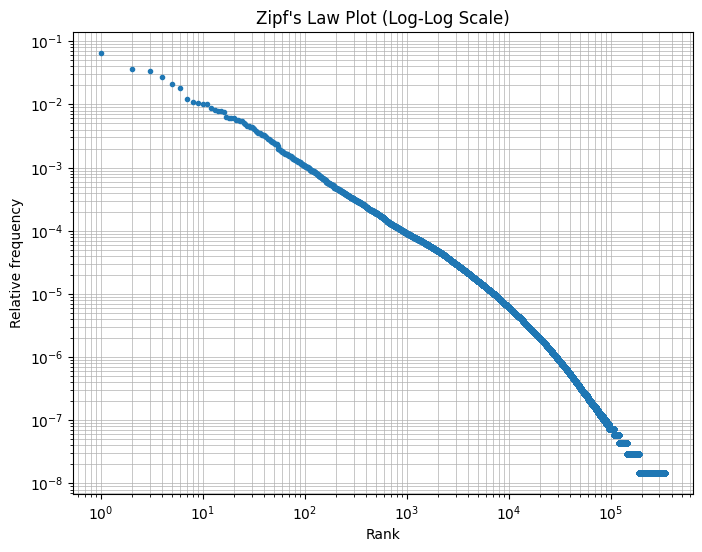

In [6]:
# TODO: Plot rank vs. relative frequency of unigrams.
import matplotlib.pyplot as plt
import numpy as np

ranks = np.arange(1, len(unigrams)+1)
relative_frequencies = np.array([freq/N for word, freq in unigrams])

# Plot Zipf's law: log-log plot
plt.figure(figsize=(8,6))
plt.loglog(ranks, relative_frequencies, marker='.', linestyle='none')
plt.xlabel('Rank')
plt.ylabel('Relative frequency')
plt.title("Zipf's Law Plot (Log-Log Scale)")
plt.grid(True, which="both", ls="-", lw=0.5)
plt.show()

Now, take your array of tokens and compute the counts of both the bigrams and trigrams and sort them in descending order of frequency. Print out the most common bigram and trigram.

Most common bigram: (('of', 'the'), 997)
Most common trigram: (('one', 'of', 'the'), 40)


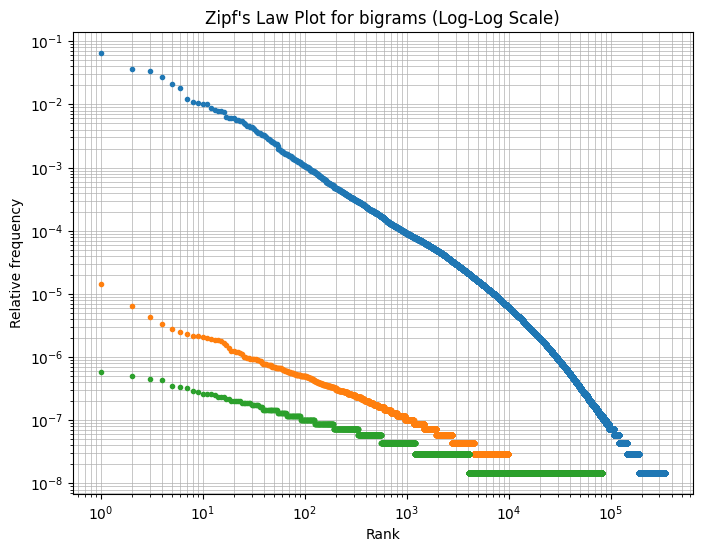

In [12]:
# TODO: Compute sorted bigram and trigram statistics.
# Print out the most common bigram and trigram.
# Plot rank vs. relative frequency for bigrams and trigrams.
# You may make separate plots or put them on the same plot and label them.
bigrams = [(tokens[i], tokens[i+1]) for i in range(len(tokens) - 1)]
trigrams = [(tokens[i], tokens[i+1], tokens[i+2]) for i in range(len(tokens) - 2)]

bigram_counts = {}
trigram_counts = {}

for i in range(len(tokens) - 1):
  bigram = (tokens[i], tokens[i+1])
  if bigram in bigram_counts:
    bigram_counts[bigram] += 1
  else:
    bigram_counts[bigram] = 1

for i in range(len(tokens) - 2):
  trigram = (tokens[i], tokens[i+1], tokens[i+2])
  if trigram in trigram_counts:
    trigram_counts[trigram] += 1
  else:
    trigram_counts[trigram] = 1

# Sort by frequency
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
sorted_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)

# Print most common
print("Most common bigram:", sorted_bigrams[0])
print("Most common trigram:", sorted_trigrams[0])

ranks_bigram = np.arange(1, len(sorted_bigrams)+1)
relative_frequencies_bigrams = np.array([freq/N for word, freq in sorted_bigrams])

ranks_trigram = np.arange(1, len(sorted_trigrams)+1)
relative_frequencies_trigrams = np.array([freq/N for word, freq in sorted_trigrams])

# Plot Zipf's law: log-log plot
plt.figure(figsize=(8,6))
plt.loglog(ranks, relative_frequencies, label = "unigrams", marker='.', linestyle='none')
plt.loglog(ranks_bigram, relative_frequencies_bigrams,label = "bigrams", marker='.', linestyle='none')
plt.loglog(ranks_trigram, relative_frequencies_trigrams, label = "bigrams", marker='.', linestyle='none')
plt.xlabel('Rank')
plt.ylabel('Relative frequency')
plt.title("Zipf's Law Plot for bigrams (Log-Log Scale)")
plt.grid(True, which="both", ls="-", lw=0.5)
plt.show()


**TODO**: Finally, write your visual impressions of the fit of the unigram, bigram, and trigram distributions. This doesn't need to be statistically rigorous.